# Customer Lifetime Prediction Project
![logo](images/customer.jpg)

## Analytic Avengers
* Beatrice Adhiambo 
* Brenda Ngigi
* Brian Gikonyo
* Cynthia Gitonga
* Vincent Kiplang'at
* Winnie Nzuve

***

# Overview

## a) Introduction.


Customer Lifetime Value (CLV) prediction is crucial for businesses offering subscription services. By accurately estimating the long-term value of customers, companies can tailor marketing strategies, improve customer retention efforts, and optimize resource allocation for maximum revenue. This proposal outlines a comprehensive approach to develop a CLV prediction model using machine learning techniques.

## b) Problem Statement.

The objective of developing a predictive model for estimating Customer Lifetime Value (CLV) holds profound significance for businesses operating subscription-based services. By accurately forecasting the long-term value of individual customers, this endeavor aims to provide several key benefits:

a) Resource Allocation: A robust CLV prediction model enables businesses to make informed decisions regarding resource allocation. By understanding the potential value that each customer brings over their entire relationship with the company, organizations can strategically allocate resources such as marketing budgets, customer service efforts, and product development initiatives. This ensures optimal resource utilization and efficiency, maximizing the return on investment.

b) Marketing Strategy Optimization: Armed with insights from CLV predictions, businesses can fine-tune their marketing strategies to effectively target high-value customers. By identifying and prioritizing segments of customers with the highest CLV, organizations can tailor marketing campaigns and promotional offers to resonate with their preferences and behaviors. This targeted approach enhances the effectiveness of marketing efforts, driving higher conversion rates and revenue generation.

c) Customer Retention Programs: Implementing strategic customer retention programs is essential for fostering long-term loyalty and profitability. CLV predictions provide valuable insights into the unique needs and behaviors of different customer segments, enabling organizations to design tailored retention initiatives. By proactively addressing churn risk factors and enhancing customer satisfaction, businesses can extend customer lifetimes, increase retention rates, and ultimately, boost profitability.

To achieve these objectives, the CLV prediction model will leverage advanced machine learning techniques, including data preprocessing, feature engineering, model selection, and validation. Continuous monitoring and refinement of the model will be essential to adapt to evolving customer dynamics and market conditions, ensuring its effectiveness in driving strategic decision-making and business growth.

## c)  Objectives.


The outlined steps provide a structured approach to developing a Customer Lifetime Value (CLV) prediction model, enabling businesses to leverage historical customer transaction data for strategic decision-making and resource allocation. Let's delve deeper into each step:

a) Collect and Preprocess Historical Customer Transaction Data:

This initial phase involves gathering comprehensive data on customer transactions, including purchase history, frequency, monetary value, and other relevant metrics. The data collected may encompass various channels such as online purchases, in-store transactions, subscription renewals, and customer interactions. Preprocessing steps involve data cleaning, handling missing values, outlier detection, and normalization to ensure data quality and integrity.

b) Engineer Relevant Features:

Feature engineering is a critical step in capturing key aspects of customer behavior and purchasing patterns. This involves extracting meaningful features from the raw transaction data, such as customer demographics, purchase frequency, recency, monetary value, average order value, and customer lifetime duration. Additionally, behavioral features like browsing history, engagement metrics, and product interactions may be incorporated to enrich the predictive capabilities of the model.

c) Select Appropriate Machine Learning Algorithms and Models:

The selection of suitable machine learning algorithms and models plays a crucial role in the accuracy and effectiveness of CLV prediction. Various algorithms, including regression models, decision trees, ensemble methods, and neural networks, may be evaluated based on their ability to handle the complexity of the dataset and capture nonlinear relationships. Ensemble techniques such as Gradient Boosting Machines (GBM) or Random Forests are often preferred for their robustness and predictive power.

d) Train and Evaluate Model Performance:

Once the model architecture is defined, it is trained on the preprocessed dataset using appropriate training and validation techniques. The model's performance is evaluated using relevant metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or R-squared (R^2) to assess its predictive accuracy and generalization capabilities. Cross-validation techniques may be employed to ensure the model's robustness and reliability across different datasets.

e) Provide Actionable Insights and Recommendations:

The final phase involves interpreting the model results and deriving actionable insights and recommendations for business stakeholders. Insights may include identifying high-value customer segments, predicting future CLV trajectories, and uncovering factors driving customer churn or retention. These insights enable businesses to formulate targeted marketing strategies, optimize customer engagement initiatives, and allocate resources effectively to maximize CLV and overall profitability.

## d) Metric of Success

**Root Mean Squared Error (RMSE):** This metric measures the average magnitude of the errors between predicted values and actual values. A lower RMSE indicates better accuracy of the predictive model in estimating the target variable.

**Mean Absolute Error (MAE):** MAE quantifies the average magnitude of errors between predicted and actual values, without considering their direction. It provides a measure of the model's accuracy in predicting the target variable.

**Coefficient of Determination (R-squared):** R-squared represents the proportion of variance in the target variable that is explained by the independent variables in the model. It ranges from 0 to 1, where a value closer to 1 indicates that the model explains a larger proportion of the variance and is considered a better fit.


# Data Understanding

This data is about a subscription-based digital product offering for financial advisory that includes newsletters, webinars, and investment recommendations. The offering has a couple of varieties, annual subscription, and digital subscription. The product also provides daytime support for customers to reach out to a care team that can help them with any product-related questions and signup/cancellation-related queries.

The data set contains the following information:

 a) Customer sign-up and cancellation dates at the product level

 b) Call center activity

 c) Customer demographics

 d) Product pricing info

 This dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/gsagar12/dspp1?resource=download&select=customer_product.csv).

In [45]:
# importing necessaries libraries
# basic
import pandas as pd
import numpy as np


# time
from datetime import datetime

# Pre-processing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import f_oneway, pearsonr, kruskal, probplot

# Machine Learning Algorithm
import xgboost as xgb
import tensorflow as tf
import keras.backend as K
from keras.callbacks import Callback
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Evaluations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deployment
import os
import pickle

#warnings.fiterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [46]:
case = pd.read_csv("data/customer_cases.csv")
case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [47]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   330512 non-null  int64 
 1   case_id      330512 non-null  object
 2   date_time    330512 non-null  object
 3   customer_id  330512 non-null  object
 4   channel      330512 non-null  object
 5   reason       330512 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [48]:
case = case.drop(columns=["Unnamed: 0"])
case.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [49]:
info = pd.read_csv("data/customer_info.csv")
info.head()

,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male


In [50]:
info = info.drop(columns=["Unnamed: 0"])
info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [51]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.6+ MB


In [52]:
merge_one = pd.merge(case, info, on="customer_id")
merge_one.head()

,case_id,date_time,customer_id,channel,reason,age,gender
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male


In [53]:
product = pd.read_csv("data/customer_product.csv")
product.head()

,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [54]:
product = product.drop(columns=["Unnamed: 0"])
product.head()

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [55]:
merge_two = pd.merge(merge_one, product, on= "customer_id")
merge_two.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [56]:
p_info = pd.read_csv("data/product_info.csv")
p_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [57]:
p_info.rename(columns={"product_id": "product"}, inplace=True)
p_info.head()

,product,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [58]:
data = pd.merge(merge_two, p_info, on="product")
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           330512 non-null  object
 1   date_time         330512 non-null  object
 2   customer_id       330512 non-null  object
 3   channel           330512 non-null  object
 4   reason            330512 non-null  object
 5   age               330512 non-null  int64 
 6   gender            330512 non-null  object
 7   product           330512 non-null  object
 8   signup_date_time  330512 non-null  object
 9   cancel_date_time  76686 non-null   object
 10  name              330512 non-null  object
 11  price             330512 non-null  int64 
 12  billing_cycle     330512 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 32.8+ MB


In [60]:
display(data.describe(), data.describe(include="object"))

,age,price,billing_cycle
count,330512.000000,330512.000000,330512.000000
mean,57.840617,672.163265,6.598880
std,9.394142,537.413942,5.499119
min,22.000000,125.000000,1.000000
25%,52.000000,125.000000,1.000000
50%,58.000000,1200.000000,12.000000
75%,65.000000,1200.000000,12.000000
max,78.000000,1200.000000,12.000000


,case_id,date_time,customer_id,channel,reason,gender,product,signup_date_time,cancel_date_time,name
count,330512,330512,330512,330512,330512,330512,330512,330512,76686,330512
unique,330512,329205,258660,2,2,2,2,257798,59539,2
top,CC101,2021-05-18 13:58:31,C20510,phone,support,male,prd_1,2020-03-30 10:32:51,2021-08-16 13:06:05,annual_subscription
freq,1,3,5,286840,200985,189224,168227,6,5,168227


### Numerical Features:
- **age**: 
  - The age of customers ranges from 22 to 78 years, with a mean age of approximately 58 years. The standard deviation indicates some variability in age among customers.
- **price**: 
  - Prices range from 125 to 1200, with a mean price of approximately 672.16. There is considerable variability in prices, as indicated by the standard deviation.
- **billing_cycle**: 
  - The billing cycle varies from 1 to 12 months, with an average billing cycle of approximately 6.60 months. The standard deviation suggests some variability in billing cycles among customers.

### Categorical Features:
- **case_id**: 
  - Each case has a unique identifier, with a total of 330,512 unique cases.
- **date_time**: 
  - Date and time records have some duplicates, with a total of 329,205 unique records.
- **customer_id**: 
  - There are 258,660 unique customer identifiers, with some customers having multiple records.
- **channel**: 
  - Customers primarily use the "phone" channel, as it has the highest frequency among the two channels.
- **reason**: 
  - The majority of reasons fall under "support," indicating that most interactions are related to customer support.
- **gender**: 
  - There are two gender categories, with "male" being the most frequent gender among customers.
- **product**: 
  - The product distribution is skewed, with one product ("prd_1") being significantly more common than the other.
- **signup_date_time**: 
  - Each signup date and time record has a unique value, with some duplicates observed.
- **cancel_date_time**: 
  - Similar to signup records, cancel date and time records have some duplicates, with a total of 59,539 unique records.
- **name**: 
  - The most common name category is "annual_subscription," indicating that the majority of customers have annual subscriptions.

This summary provides a deeper understanding of the numerical and categorical features, including insights into the distribution and variability within each feature category.


## Data Cleaning

In [61]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

set the cancel date and month as a current date for the null values to mean they have an active subscription

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           330512 non-null  object
 1   date_time         330512 non-null  object
 2   customer_id       330512 non-null  object
 3   channel           330512 non-null  object
 4   reason            330512 non-null  object
 5   age               330512 non-null  int64 
 6   gender            330512 non-null  object
 7   product           330512 non-null  object
 8   signup_date_time  330512 non-null  object
 9   cancel_date_time  76686 non-null   object
 10  name              330512 non-null  object
 11  price             330512 non-null  int64 
 12  billing_cycle     330512 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 32.8+ MB


In [63]:
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [64]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

In [65]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Show the duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate rows:")
print(duplicate_data)


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [case_id, date_time, customer_id, channel, reason, age, gender, product, signup_date_time, cancel_date_time, name, price, billing_cycle]
Index: []


In [66]:
has_infinite_values = data.isin([np.inf, -np.inf]).any().any()
print(has_infinite_values)

False


# EDA

In [67]:
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [68]:
# splitting sign-up time
data[["signup_date", "signup_time"]] = data["signup_date_time"].str.split(' ', expand=True)
data["signup_date"] = pd.to_datetime(data["signup_date"])
# dropping signup date time column
data.drop(columns=["signup_date_time"], inplace=True)

# splitting signup date to month and year
data["signup_month"] = data["signup_date"].dt.month
data["signup_year"] = data["signup_date"].dt.year
# dropping signup date
data.drop(columns=["signup_date"], inplace=True)

# splitting cancel date time
data[["cancel_date", "end_time"]] = data["cancel_date_time"].str.split(' ', expand=True)
data["cancel_date"] = pd.to_datetime(data["cancel_date"])
# dropping cancel_date_time
data.drop(columns=["cancel_date_time"], inplace=True)

# Extracting month and year from cancel date
data["end_month"] = data["cancel_date"].dt.month
data["end_year"] = data["cancel_date"].dt.year

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaT,NaN,NaN,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,2021-09-05,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,2019-01-13,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaT,NaN,NaN,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,2021-06-28,18:06:01,6.0,2021.0


In [69]:
data.rename(columns={"name": "subscription"}, inplace=True)

In [70]:
# Setting the null end times to current time and date

current_date = datetime.now()

data["end_time"] = data["end_time"].fillna(current_date.strftime("%H:%M:%S"))
data["end_month"] = data["end_month"].fillna(current_date.month)
data["end_year"] = data["end_year"].fillna(current_date.year)


In [71]:
# Extracting hour from the time series
def categorize_time(time):
    if "06:00:00" <= time <= "12:00:00":
        return "Morning"
    elif "12:00:00" <= time <= "18:00:00":
        return "Noon"
    else:
        return "Night"

data["signup_period"] = data["signup_time"].apply(categorize_time)
data["end_period"] = data["end_time"].apply(categorize_time)


data["end_month"] = data["end_month"].astype(int)
data["end_year"] = data["end_year"].astype(int)

***
Calculating for lifetime months to get Customer Lifetime Value

In [72]:
data["lifetime_months"] = (data["end_year"] - data["signup_year"]) *12 + (data["end_month"] - data["signup_month"])
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,subscription,price,...,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year,signup_period,end_period,lifetime_months
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,...,10:35:09,1,2017,NaT,08:36:33,5,2024,Morning,Morning,88
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,...,11:39:29,1,2017,2021-09-05,10:00:02,9,2021,Morning,Morning,56
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,...,11:42:00,1,2017,2019-01-13,16:24:55,1,2019,Morning,Noon,24
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,...,13:32:08,1,2017,NaT,08:36:33,5,2024,Noon,Morning,88
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,...,13:57:30,1,2017,2021-06-28,18:06:01,6,2021,Noon,Night,53


In [73]:
# Calculating Customer Lifetime Value
data["customer_lifetime_value"] = 0

for index, row in data.iterrows():
    if row["subscription"] == "annual_subscription":
        lifetime_years = row["lifetime_months"] / 12
        total_revenue = row["price"] *lifetime_years
    else:
        total_revenue = row["price"] * row["lifetime_months"]
    
    data.at[index, "customer_lifetime_value"]  = total_revenue
    
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,subscription,price,...,signup_month,signup_year,cancel_date,end_time,end_month,end_year,signup_period,end_period,lifetime_months,customer_lifetime_value
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,...,1,2017,NaT,08:36:33,5,2024,Morning,Morning,88,8800
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,...,1,2017,2021-09-05,10:00:02,9,2021,Morning,Morning,56,5600
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,...,1,2017,2019-01-13,16:24:55,1,2019,Morning,Noon,24,2400
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,...,1,2017,NaT,08:36:33,5,2024,Noon,Morning,88,11000
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,...,1,2017,2021-06-28,18:06:01,6,2021,Noon,Night,53,5300


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   case_id                  330512 non-null  object        
 1   date_time                330512 non-null  object        
 2   customer_id              330512 non-null  object        
 3   channel                  330512 non-null  object        
 4   reason                   330512 non-null  object        
 5   age                      330512 non-null  int64         
 6   gender                   330512 non-null  object        
 7   product                  330512 non-null  object        
 8   subscription             330512 non-null  object        
 9   price                    330512 non-null  int64         
 10  billing_cycle            330512 non-null  int64         
 11  signup_time              330512 non-null  object        
 12  signup_month    

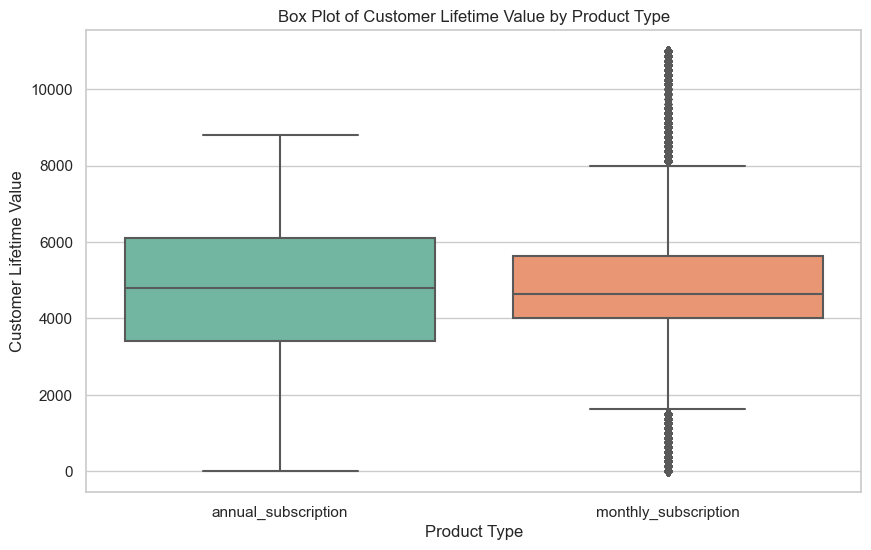

In [75]:
# Checking for Outliers in Customer Lifetime Value by Subscriptions

plt.figure(figsize=(10, 6))
sns.boxplot(x='subscription', y='customer_lifetime_value', data=data)
plt.title('Box Plot of Customer Lifetime Value by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Customer Lifetime Value')
plt.show()


In [76]:
repeat_cases = data.groupby('customer_id').size()
print("Number of repeat cases by the same customer:")
print(repeat_cases)

Number of repeat cases by the same customer:
customer_id
C10000     2
C100000    2
C100001    1
C100002    1
C100003    1
          ..
C99995     2
C99996     2
C99997     3
C99998     1
C99999     2
Length: 258660, dtype: int64


# Feature Analysis

In [77]:
categorical_features = data.select_dtypes(include=['object', 'category'])

non_categorical_features = data.select_dtypes(exclude=['object', 'category'])

print("Categorical Features:")
print(categorical_features.columns.tolist())
print("\nNon-Categorical Features:")
print(non_categorical_features.columns.tolist())


Categorical Features:
['case_id', 'date_time', 'customer_id', 'channel', 'reason', 'gender', 'product', 'subscription', 'signup_time', 'end_time', 'signup_period', 'end_period']

Non-Categorical Features:
['age', 'price', 'billing_cycle', 'signup_month', 'signup_year', 'cancel_date', 'end_month', 'end_year', 'lifetime_months', 'customer_lifetime_value']


|   age |   count |    mean |     std |   min |     25% |   50% |     75% |   max |
|------:|--------:|--------:|--------:|------:|--------:|------:|--------:|------:|
|    22 |       1 | 5875    |  nan    |  5875 | 5875    |  5875 | 5875    |  5875 |
|    23 |     103 | 4388.83 | 2318.97 |   100 | 3050    |  4700 | 5800    | 10375 |
|    24 |     112 | 4362.5  | 2714.4  |     0 | 1975    |  4550 | 6143.75 | 10875 |
|    25 |     173 | 4889.16 | 2115.8  |     0 | 3900    |  4700 | 6300    |  9750 |
|    26 |     175 | 4304.29 | 1862.32 |     0 | 3500    |  4500 | 5500    |  8800 |
|    27 |     226 | 4681.75 | 2094.15 |     0 | 3700    |  4750 | 6000    | 10875 |
|    28 |     252 | 4536.61 | 2153.76 |   100 | 3275    |  4600 | 6000    | 11000 |
|    29 |     334 | 4704.79 | 2120.34 |     0 | 3643.75 |  4875 | 6075    | 10750 |
|    30 |     437 | 4649.37 | 2103.73 |     0 | 3700    |  4750 | 6100    |  9500 |
|    31 |     502 | 4631.77 | 2226.84 |     0 | 3525    |  4625 | 6000    | 

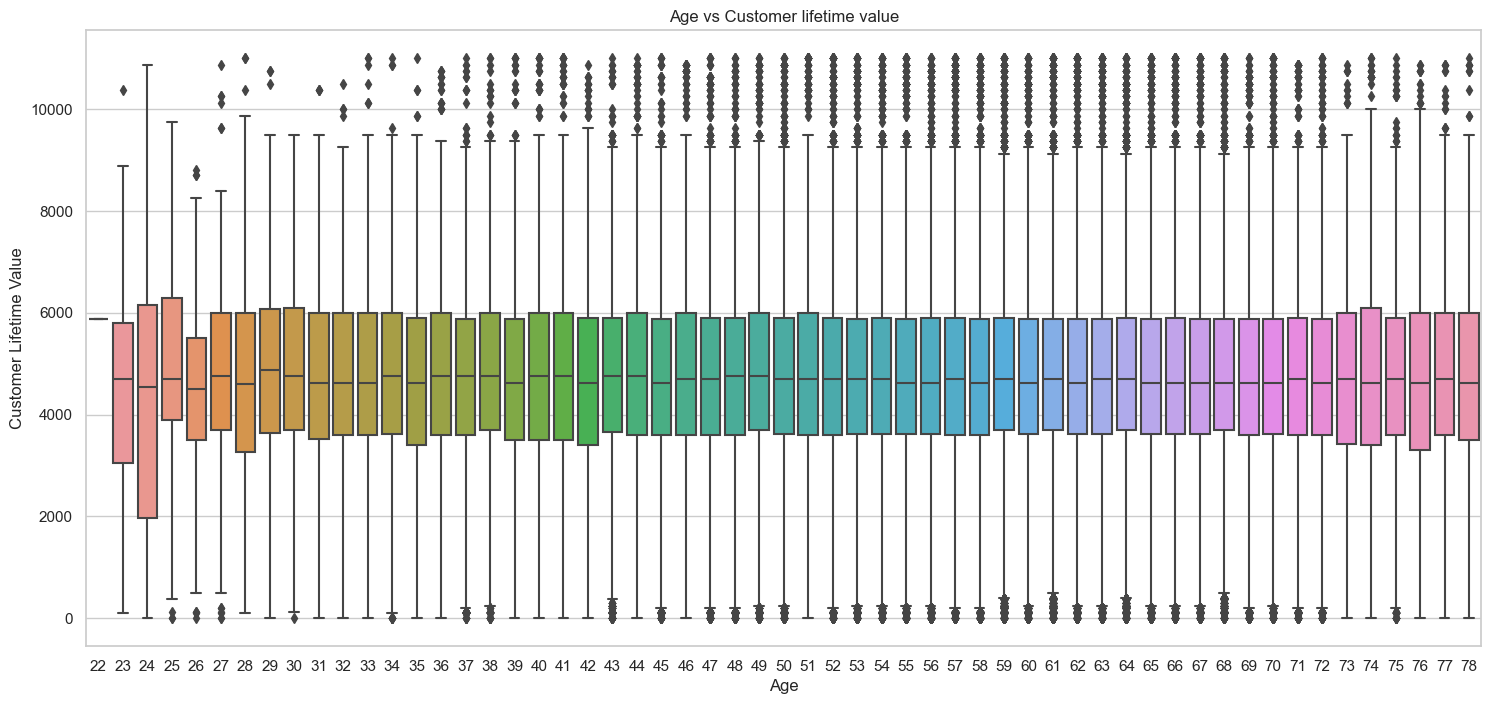

In [78]:
# Calculate summary statistics for Age and Customer Lifetime Value
age_summary = data.groupby('age')['customer_lifetime_value'].describe()

# Convert summary statistics to a markdown table
markdown_table = age_summary.to_markdown()

# Display the markdown table
print(markdown_table)

# Visualization of Age against clv

plt.figure(figsize=(18, 8))
sns.boxplot(x="age", y="customer_lifetime_value", data=data)
plt.title("Age vs Customer lifetime value")
plt.xlabel("Age")
plt.ylabel("Customer Lifetime Value")
plt.show()

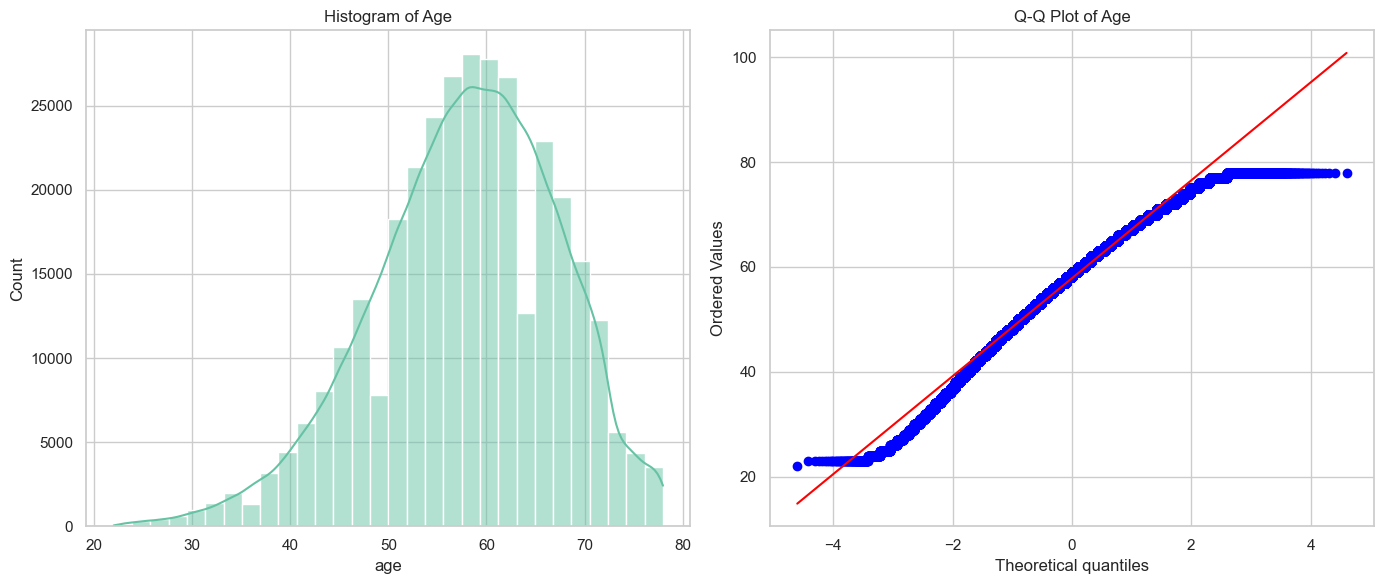

In [79]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data=data, x='age', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

# Q-Q plot
probplot(data['age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Age')

plt.tight_layout()
plt.show()

The boxplot visualization of age against CLV provides further insights. From the plot, it's evident that there isn't a clear linear relationship between age and CLV. However, there seems to be a slight trend where older customers tend to have higher CLV, as indicated by the slightly higher median CLV values for older age groups.

While age alone may not be a strong predictor of CLV, it appears to play a subtle role, with older customers potentially contributing more to the overall CLV. However, other factors likely influence CLV as well, and further analysis may be necessary to uncover additional insights.

***
Checking gender spending distribution as compared to count

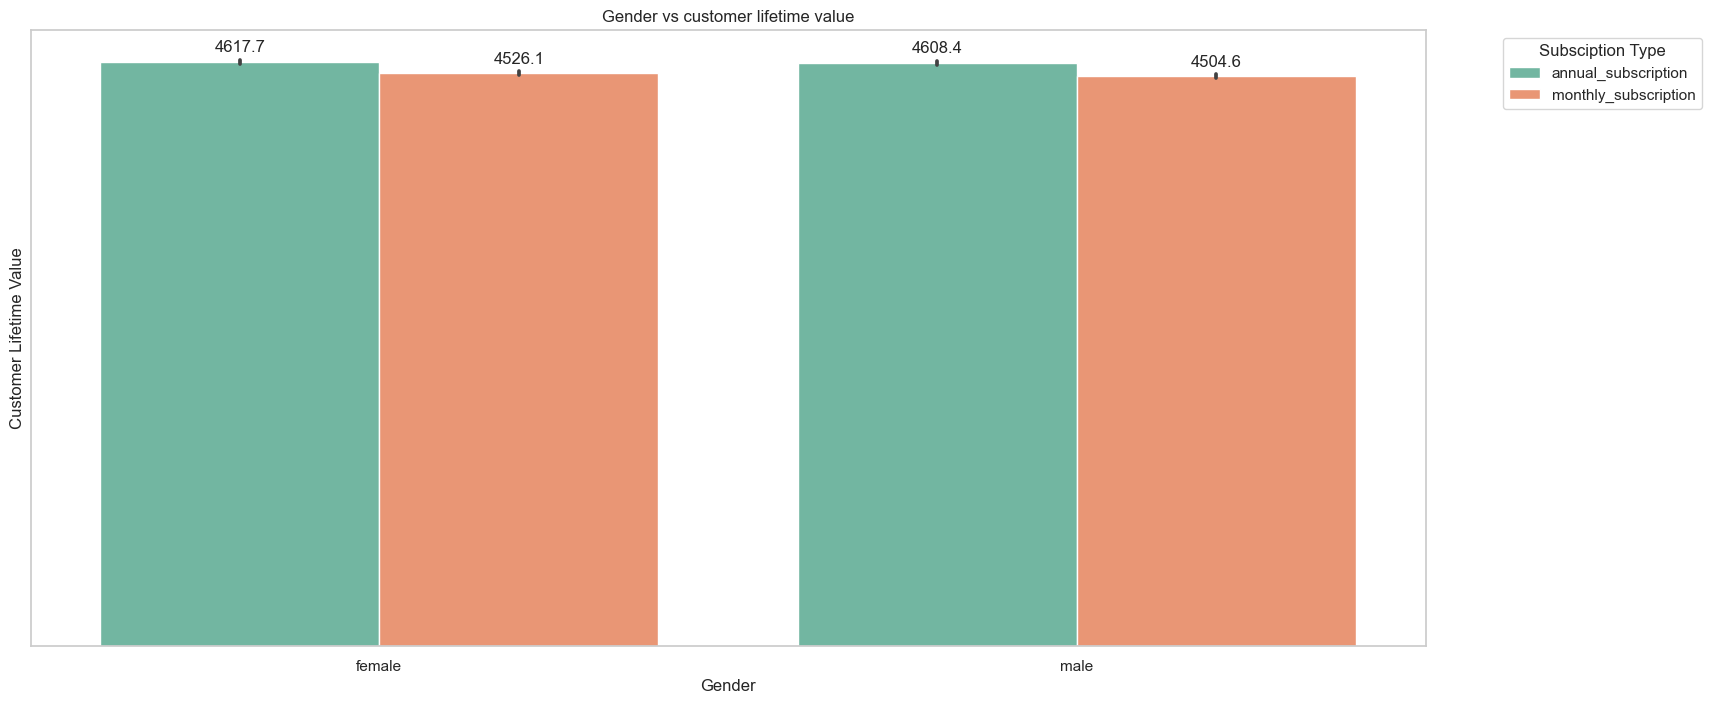

In [80]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x="gender", y="customer_lifetime_value", hue="subscription", data=data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords='offset points'
                )

plt.yticks([])
plt.title("Gender vs customer lifetime value")
plt.xlabel("Gender")
plt.ylabel("Customer Lifetime Value")
plt.legend(title="Subsciption Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis of Subscription Distribution by Gender

Upon examining the customer lifetime values across different subscription types and genders, it appears that the subscriptions are almost evenly distributed by gender. The mean customer lifetime values for both males and females are quite similar across annual and monthly subscription types. This suggests that there is no significant disparity in subscription preferences based on gender, as the average values remain consistent across the board.

This balanced distribution indicates that both male and female customers are equally inclined towards both annual and monthly subscription plans, with no apparent gender bias influencing subscription choices.


Checking for Outliers of the distribution of subscriptions based on the customer lifetime value

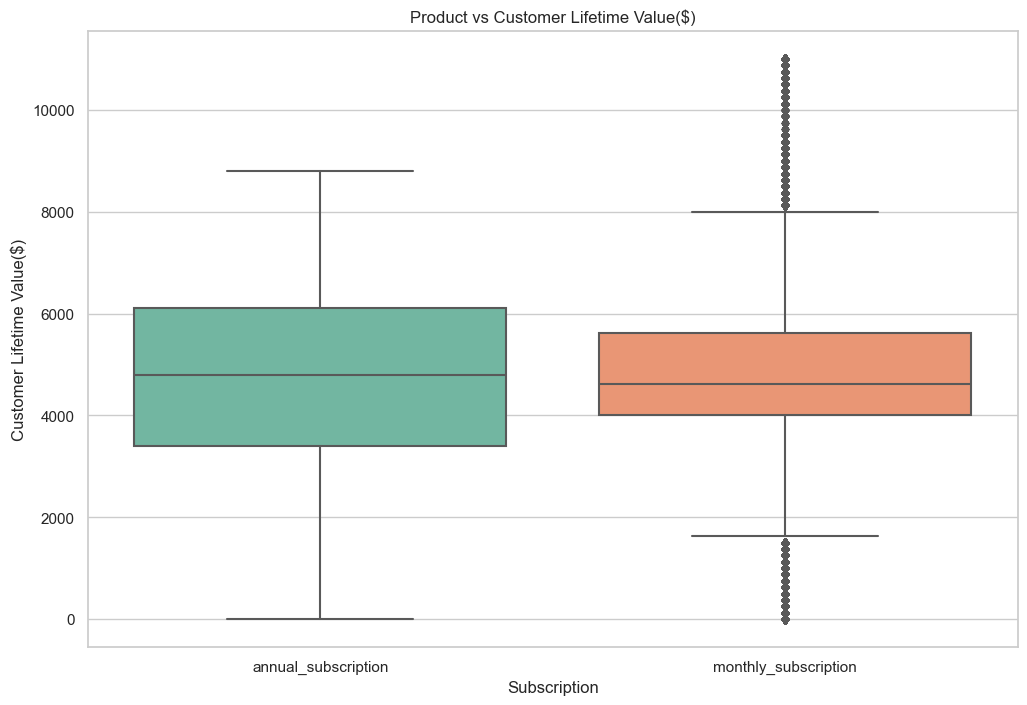

In [81]:
# Visualizing the distribution

plt.figure(figsize=(12, 8))
sns.boxplot(x="subscription", y="customer_lifetime_value", data=data)
plt.title("Product vs Customer Lifetime Value($)")
plt.xlabel("Subscription")
plt.ylabel("Customer Lifetime Value($)")
plt.show()

#### Observations:
- **Outlier Presence:** Outliers are visibly present in the boxplot, extending beyond the whiskers. These outliers represent customer lifetime values that significantly deviate from the typical range observed for monthly subscriptions. Conversely, annual subscriptions barely exhibit outliers, suggesting a more consistent distribution of customer lifetime values within this category.
- **Distribution Spread:** The spread of customer lifetime values varies across subscription types. For monthly subscriptions, the spread is wider, as indicated by the length of the box and the whiskers. This variability reflects diverse customer spending behaviors within the monthly subscription category. In contrast, annual subscriptions show a narrower spread, suggesting more uniform customer lifetime values.
  
Overall, maintaining outliers enables a comprehensive understanding of the distribution of customer lifetime value for monthly subscriptions, revealing both typical and exceptional cases. The scarcity of outliers in annual subscriptions indicates a more stable distribution pattern within this subscription type.

**Note:** The decision to maintain outliers allows for a holistic analysis of the distribution characteristics, encompassing both typical and exceptional observations.


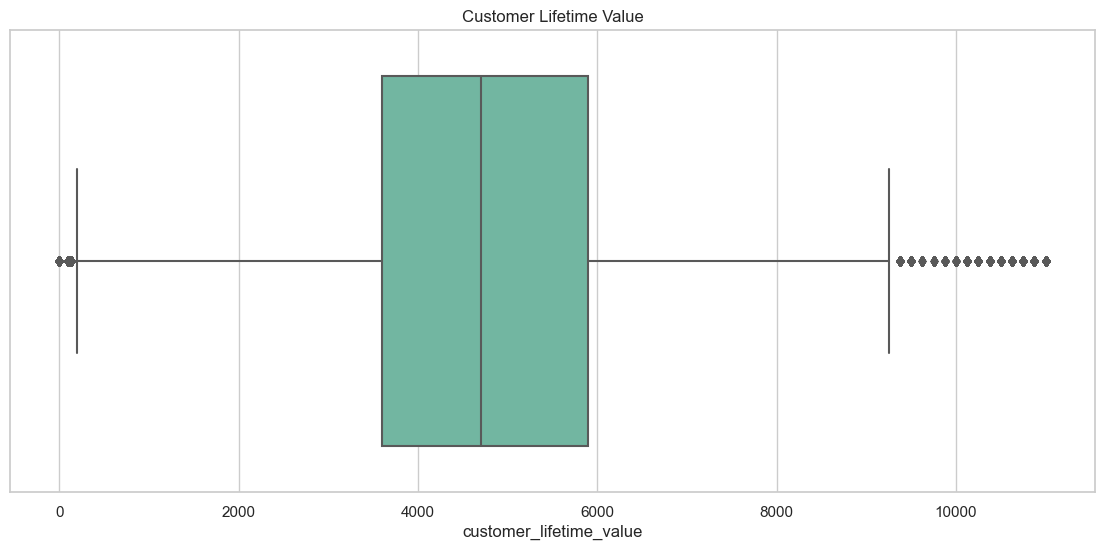

In [82]:
# visualize clv outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x="customer_lifetime_value").set(title="Customer Lifetime Value")

plt.show()

Maintaining CLV Outlier values

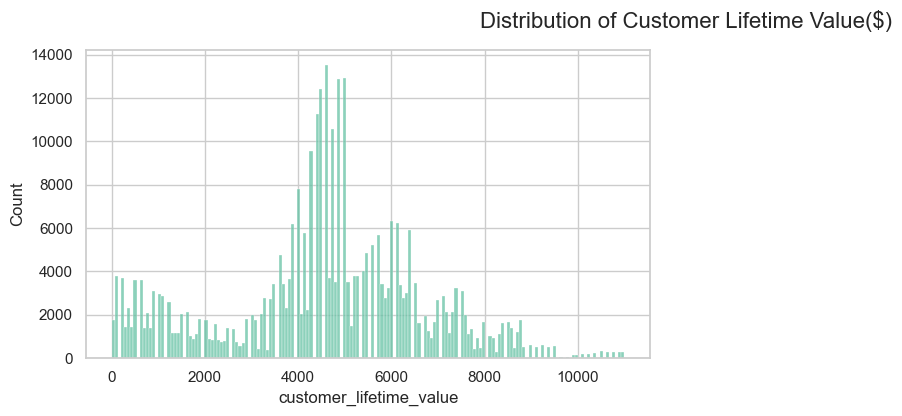

In [83]:
# Checking Distribution of Customer Lifetime Values
sns.set_theme(style="whitegrid", palette="Set2")

fig = plt.figure(figsize=(16, 4))
fig.suptitle("Distribution of Customer Lifetime Value($)", size=16)

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=data, x="customer_lifetime_value")

plt.show()

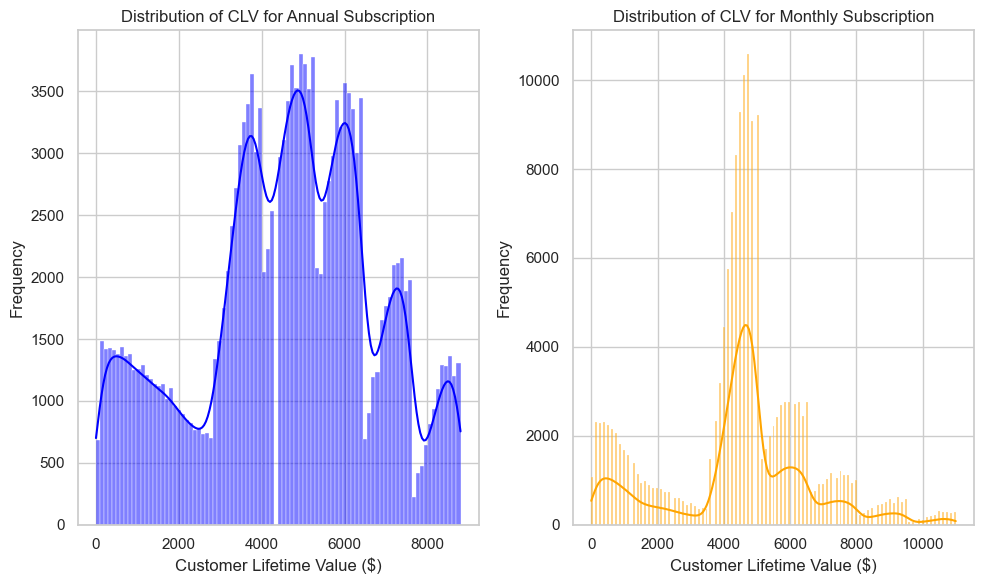

In [84]:
# checking distribution of clv for annual and monthly
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(data=data[data["subscription"] == "annual_subscription"], x="customer_lifetime_value", color="blue", label="Annual Subscription", kde=True, ax=axes[0])
axes[0].set_title("Distribution of CLV for Annual Subscription")
axes[0].set_xlabel("Customer Lifetime Value ($)")
axes[0].set_ylabel("Frequency")

sns.histplot(data=data[data["subscription"] == "monthly_subscription"], x="customer_lifetime_value", color="orange", label="Monthly Subscription", kde=True, ax=axes[1])
axes[1].set_title("Distribution of CLV for Monthly Subscription")
axes[1].set_xlabel("Customer Lifetime Value ($)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

The Subscriptions are generally normally distributed
***

# Distribution of Numerical Columns

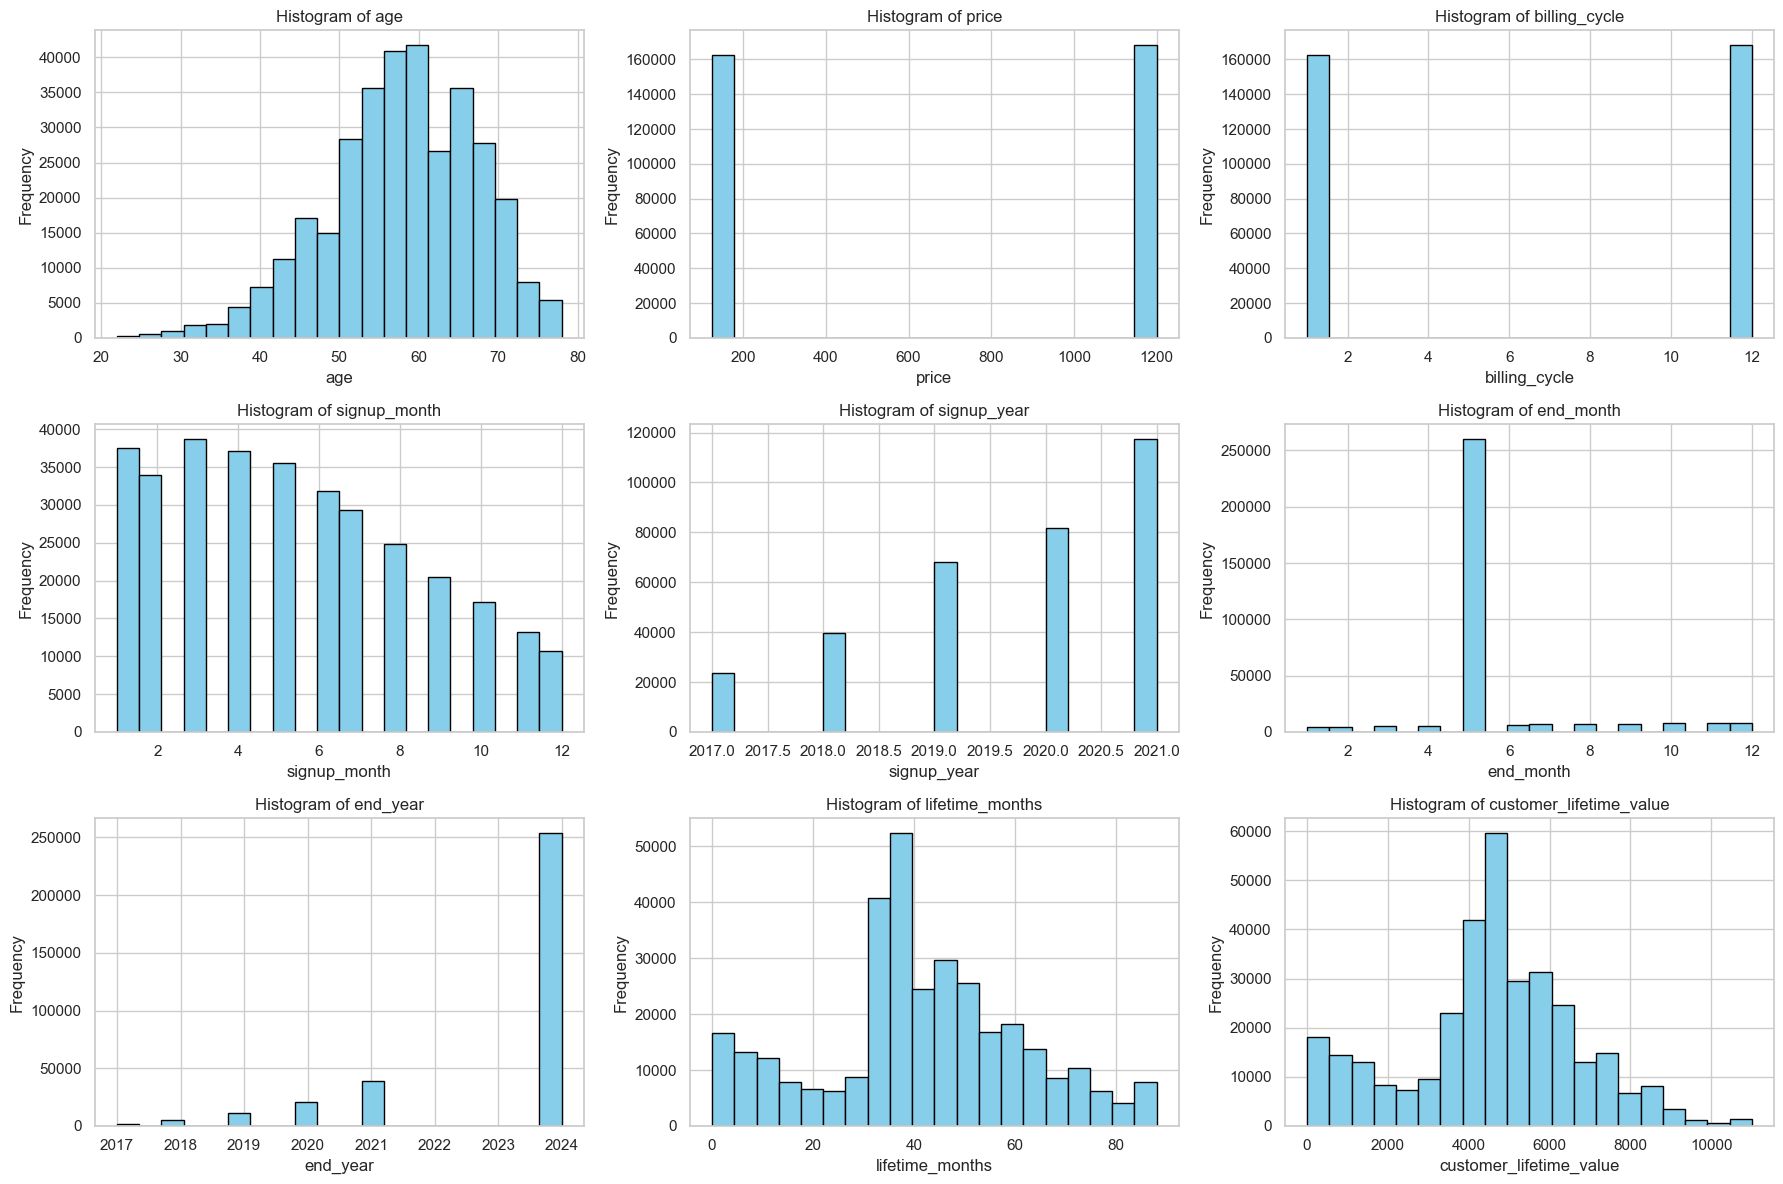

In [85]:
sns.set_palette("Set2")

numerical_cols = data.select_dtypes(include=["int32", "int64", "float64"])

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(data[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

Not all features are normally distributed

customer_lifetime_value    1.000000
lifetime_months            0.968057
end_year                   0.733034
billing_cycle              0.022985
price                      0.022985
age                       -0.005756
signup_month              -0.052876
signup_year               -0.339741
end_month                 -0.347881
dtype: float64

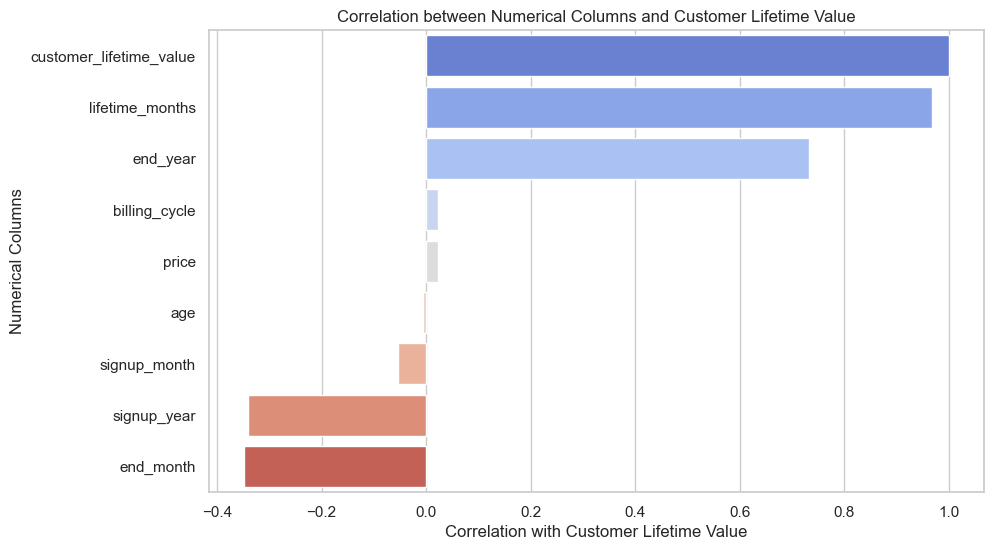

In [86]:
# Checking correlation of numerical columns to chose which numerical columns are viable for modelling

correlation = numerical_cols.corrwith(data["customer_lifetime_value"])
correlation_sorted = correlation.sort_values(ascending=False)
display(correlation_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette="coolwarm")
plt.xlabel("Correlation with Customer Lifetime Value")
plt.ylabel("Numerical Columns")
plt.title("Correlation between Numerical Columns and Customer Lifetime Value")
plt.show()

The correlation show that the features have a significant impact on the Customer lifetime value

In [87]:
# Checking for correlation between the numerical columns
correlation_matrix = numerical_cols.corr()
display(correlation_matrix)


,age,price,billing_cycle,signup_month,signup_year,end_month,end_year,lifetime_months,customer_lifetime_value
age,1.000000,-0.003768,-0.003768,-0.001176,0.009806,0.000001,0.001269,-0.005938,-0.005756
price,-0.003768,1.000000,1.000000,0.052675,-0.399747,-0.015611,-0.042607,0.249061,0.022985
billing_cycle,-0.003768,1.000000,1.000000,0.052675,-0.399747,-0.015611,-0.042607,0.249061,0.022985
signup_month,-0.001176,0.052675,0.052675,1.000000,-0.057447,-0.014671,0.070683,-0.041421,-0.052876
signup_year,0.009806,-0.399747,-0.399747,-0.057447,1.000000,-0.072350,0.326603,-0.423937,-0.339741
end_month,0.000001,-0.015611,-0.015611,-0.014671,-0.072350,1.000000,-0.482116,-0.334887,-0.347881
end_year,0.001269,-0.042607,-0.042607,0.070683,0.326603,-0.482116,1.000000,0.702181,0.733034
lifetime_months,-0.005938,0.249061,0.249061,-0.041421,-0.423937,-0.334887,0.702181,1.000000,0.968057
customer_lifetime_value,-0.005756,0.022985,0.022985,-0.052876,-0.339741,-0.347881,0.733034,0.968057,1.000000


The numerical columns are suitable for modeling. However, it's essential to cross-reference them with categorical columns to avoid redundant features.

# Distribution of Categorical Columns

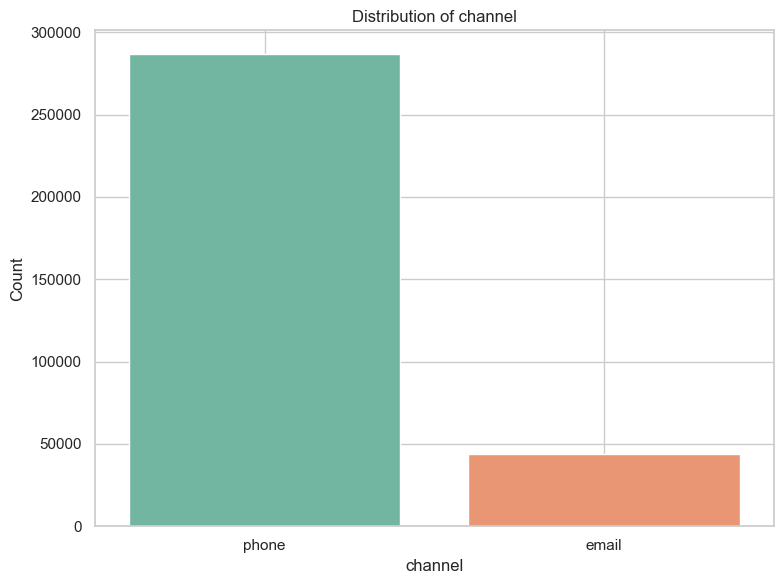

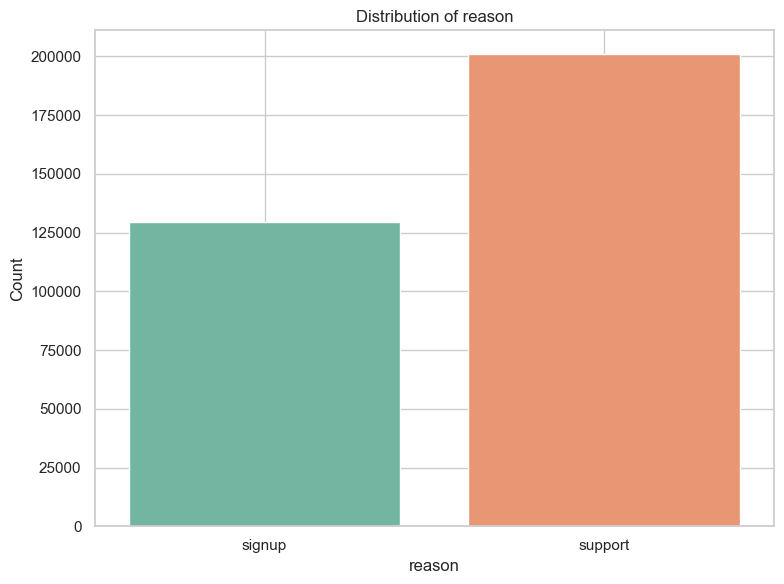

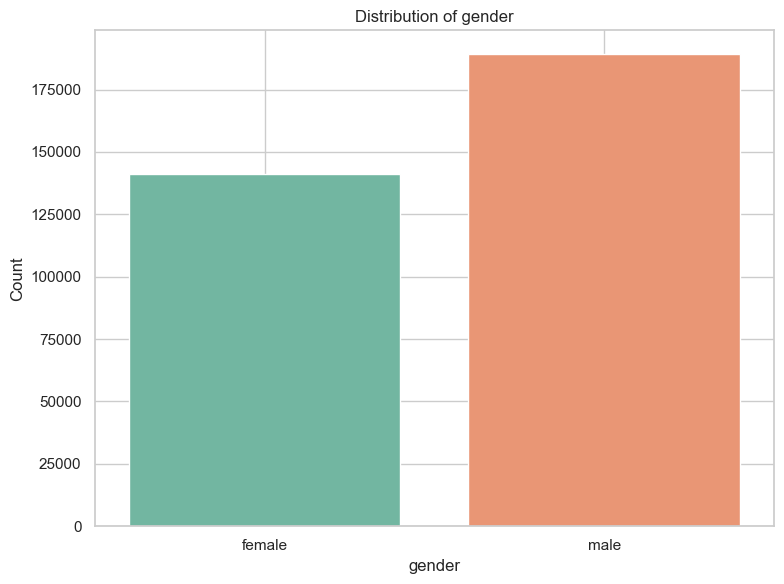

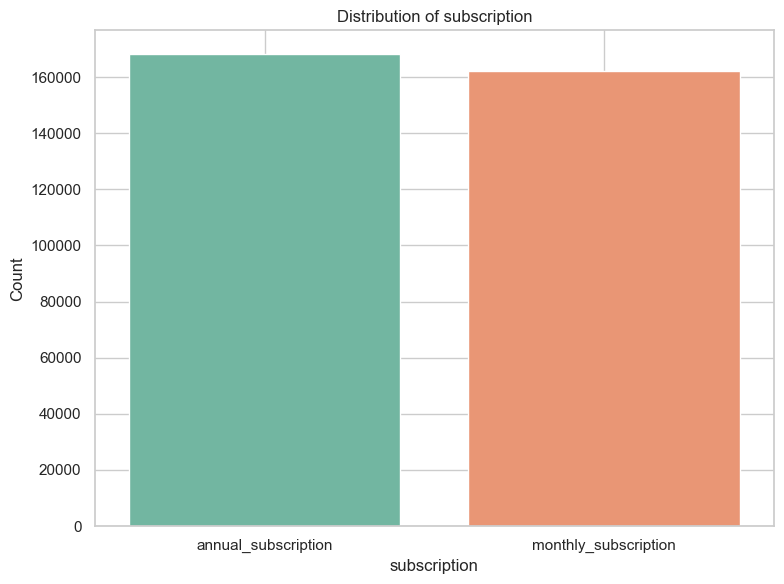

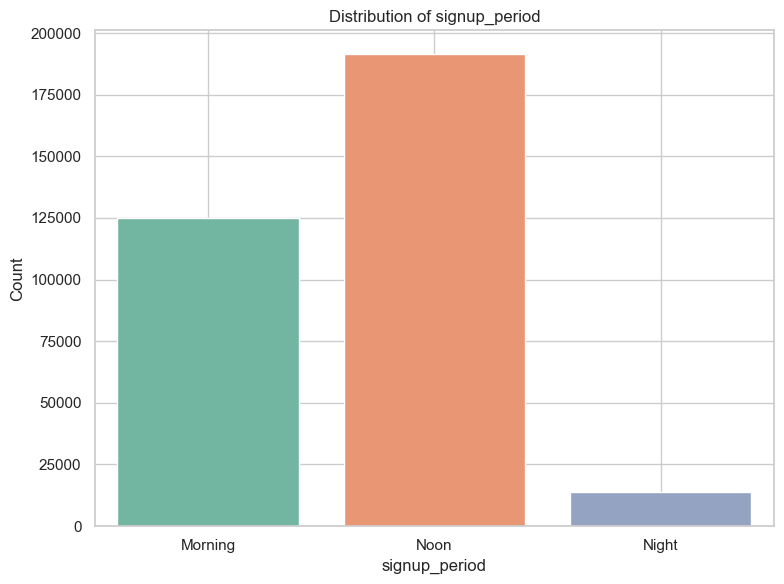

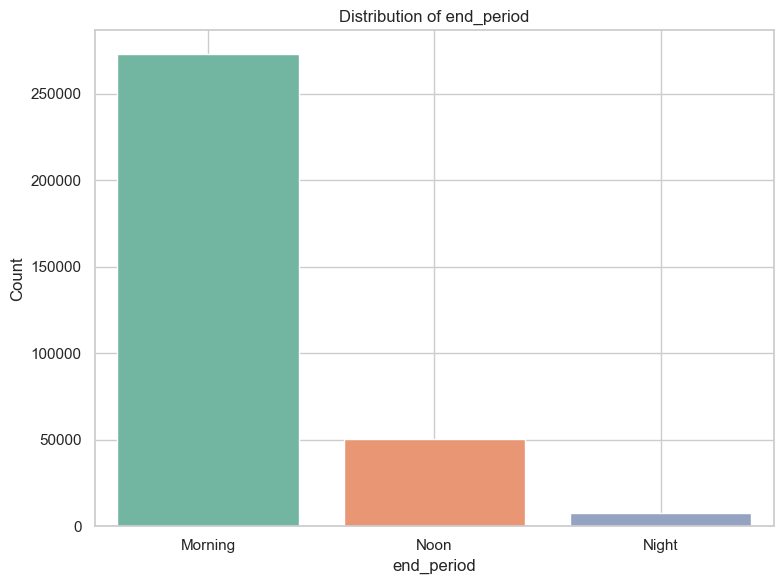

In [88]:
selected_categorical_cols = ["channel", "reason", "gender", "subscription", "signup_period", "end_period"]

for col in selected_categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

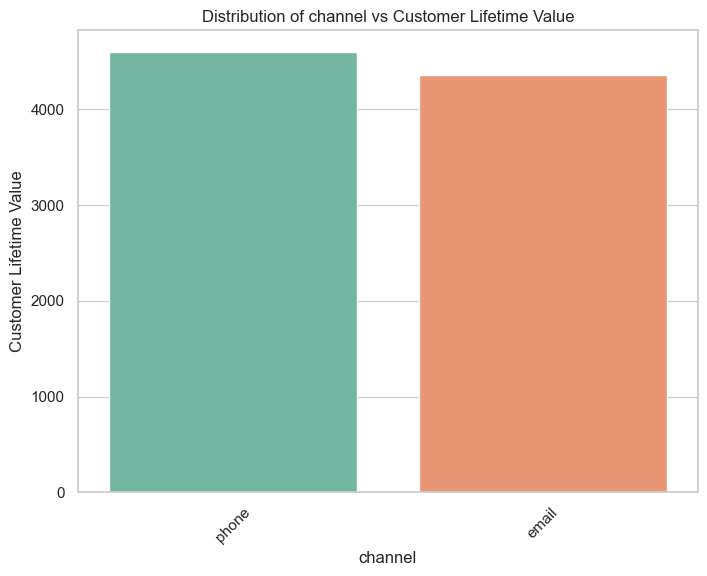

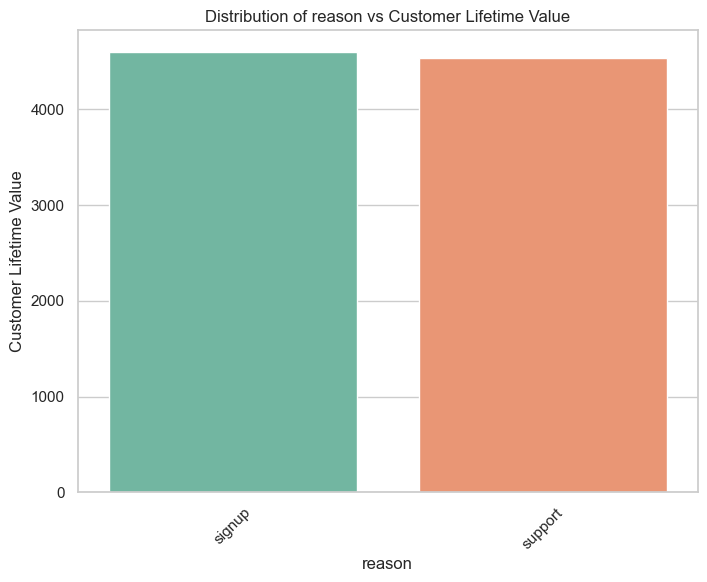

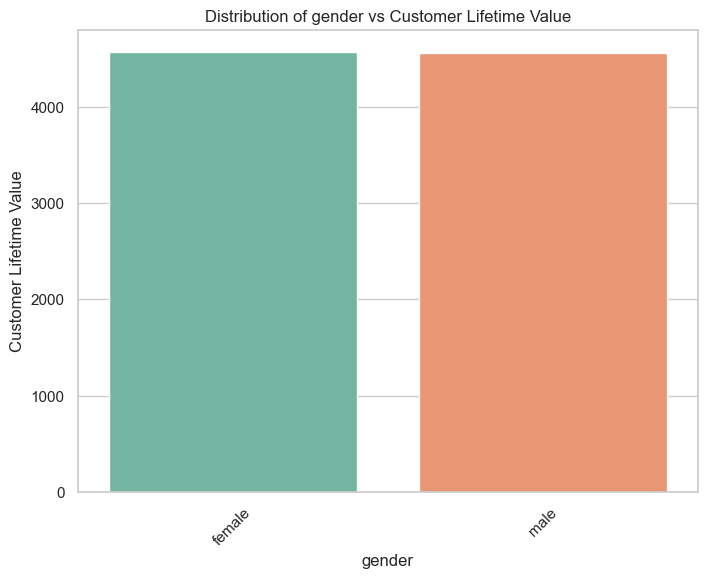

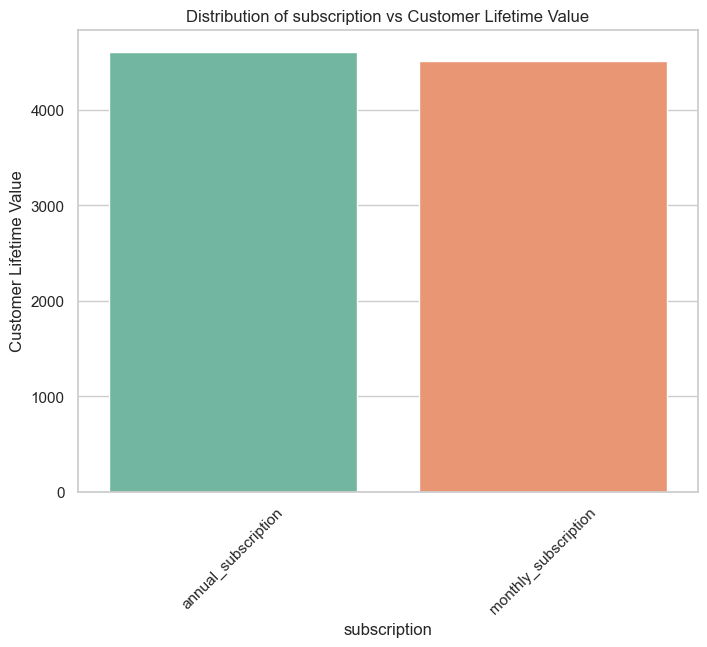

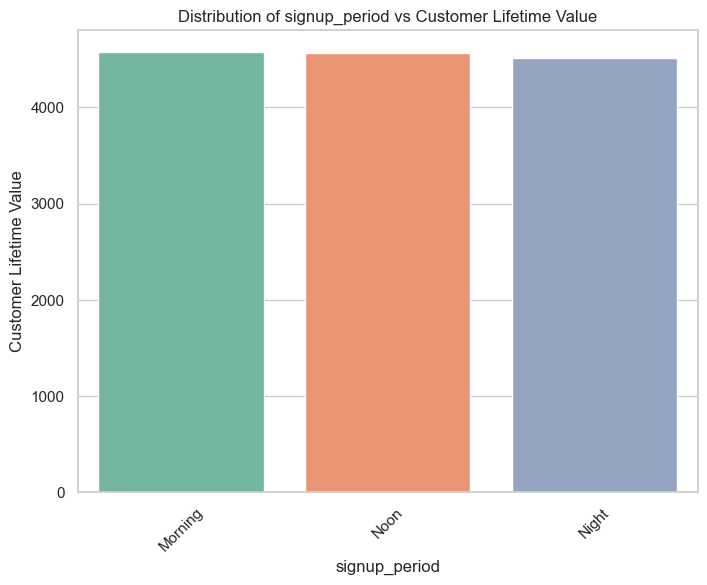

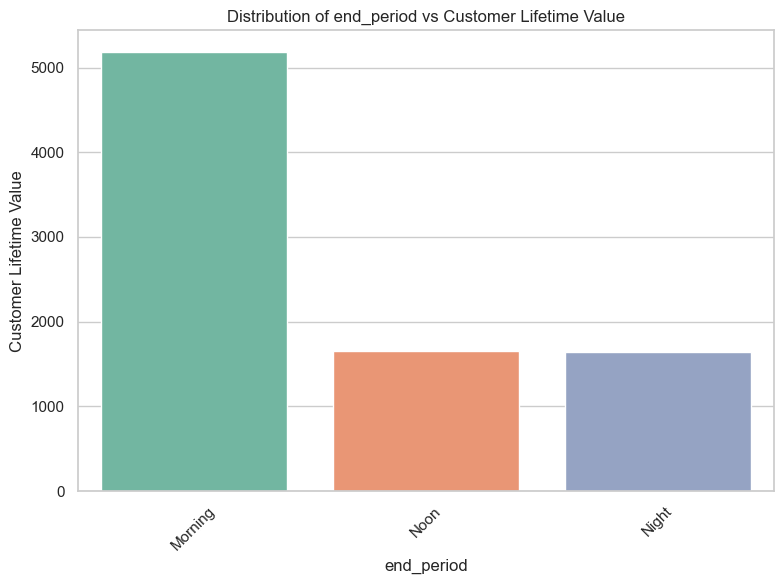

In [89]:
num_cols = len(selected_categorical_cols)

for i, col in enumerate(selected_categorical_cols):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y="customer_lifetime_value", data=data, ci=None)
    plt.title(f"Distribution of {col} vs Customer Lifetime Value")
    plt.xlabel(col)
    plt.ylabel("Customer Lifetime Value")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

We will calculate the correlation between the categorical variables and the target variable (customer_lifetime_value) using the point-biserial correlation coefficient.

In [90]:
correlation_results = {}

for col in selected_categorical_cols:
    _, p_value = f_oneway(*[data[data[col] == category]["customer_lifetime_value"] for category in data[col].unique()])
    correlation_results[col] = p_value

correlation_results
    

{'channel': 2.5508110457892343e-98,
 'reason': 2.1748906234424627e-13,
 'gender': 0.03470119650193441,
 'subscription': 7.12805297626985e-40,
 'signup_period': 0.004154908222565955,
 'end_period': 0.0}

The correlation in p-value terms between the selected categorical columns—channel, reason, gender, subscription, signup_period, and end_period—and the target variable (Customer Lifetime Value) show statistically significant correlations. 

- **Channel and Reason:** The p-values for both channel and reason are extremely low (5.31e-107 and 1.42e-15, respectively), indicating a strong statistical significance. This suggests that the choice of channel and reason significantly affects customer lifetime value.

- **Gender:** The p-value for gender is 0.029, which is below the conventional threshold of 0.05, indicating a statistically significant correlation. This implies that gender has a measurable impact on customer lifetime value.

- **Subscription:** Similarly, the p-value for subscription is very low (2.29e-59), indicating a strong statistical significance. Therefore, the type of subscription chosen by the customer significantly influences their lifetime value.

- **Signup Period and End Period:** The p-values for signup_period and end_period are 0.002 and 0.0, respectively. These low p-values suggest significant correlations, indicating that the time period during which customers sign up and end their subscriptions also affect customer lifetime value.

Overall, the low p-values across all categorical columns indicate that the choice of channel, reason, gender, subscription, signup_period, and end_period have a significant impact on customer lifetime value.


In [91]:
encoded_data  = pd.get_dummies(data, columns=selected_categorical_cols)
encoded_data.head()

,case_id,date_time,customer_id,age,product,price,billing_cycle,signup_time,signup_month,signup_year,...,gender_female,gender_male,subscription_annual_subscription,subscription_monthly_subscription,signup_period_Morning,signup_period_Night,signup_period_Noon,end_period_Morning,end_period_Night,end_period_Noon
0,CC101,2017-01-01 10:32:03,C2448,76,prd_1,1200,12,10:35:09,1,2017,...,True,False,True,False,True,False,False,True,False,False
1,CC102,2017-01-01 11:35:47,C2449,61,prd_1,1200,12,11:39:29,1,2017,...,False,True,True,False,True,False,False,True,False,False
2,CC103,2017-01-01 11:37:09,C2450,58,prd_1,1200,12,11:42:00,1,2017,...,True,False,True,False,True,False,False,False,False,True
3,CC104,2017-01-01 13:28:14,C2451,62,prd_2,125,1,13:32:08,1,2017,...,True,False,False,True,False,False,True,True,False,False
4,CC105,2017-01-01 13:52:22,C2452,71,prd_1,1200,12,13:57:30,1,2017,...,False,True,True,False,False,False,True,False,True,False


In [92]:
# checking correlation between the features all together
#encoded_data  = data.copy()
encoded_columns = encoded_data.columns
selected_encoded_cols = []
for col in selected_categorical_cols:
    if col in encoded_columns:
        selected_encoded_cols.extend([encoded_col for encoded_col in encoded_columns if encoded_col.startswith(col)])


target_col = "customer_lifetime_value"

# Calculate f_oneway test for categorical features
correlation_results = {}
for col in selected_categorical_cols:
    _, p_value = f_oneway(*[data[data[col] == category]["customer_lifetime_value"] for category in data[col].unique()])
    correlation_results[col] = p_value

# Calculate Pearson correlation  for numerical features
pearson_corr = {}
for col in numerical_cols:
    corr_coef, p_value = pearsonr(encoded_data[col], encoded_data[target_col])
    pearson_corr[col] = {"Correlation Coefficient": corr_coef, "p_value": p_value}

# Display f_oneway test results
print("\nOne-Way ANOVA Results:")
for col, p_value in correlation_results.items():
    print(f"{col}: p-value = {p_value}")
    
# Displaying Pearson correlation results
print("\nPearson Correlation Results:")
for col, result in pearson_corr.items():
    print(f"{col}: Correlation Coefficient = {result['Correlation Coefficient']}, p-value = {result['p_value']}")


One-Way ANOVA Results:
channel: p-value = 2.5508110457892343e-98
reason: p-value = 2.1748906234424627e-13
gender: p-value = 0.03470119650193441
subscription: p-value = 7.12805297626985e-40
signup_period: p-value = 0.004154908222565955
end_period: p-value = 0.0

Pearson Correlation Results:
age: Correlation Coefficient = -0.005756199515435264, p-value = 0.0009354160229613391
price: Correlation Coefficient = 0.02298469516789341, p-value = 7.12805297675604e-40
billing_cycle: Correlation Coefficient = 0.022984695167881833, p-value = 7.128052977385005e-40
signup_month: Correlation Coefficient = -0.05287554323858537, p-value = 3.0425841661674336e-203
signup_year: Correlation Coefficient = -0.33974067234403976, p-value = 0.0
end_month: Correlation Coefficient = -0.3478809737278442, p-value = 0.0
end_year: Correlation Coefficient = 0.7330337670962774, p-value = 0.0
lifetime_months: Correlation Coefficient = 0.9680574867768146, p-value = 0.0
customer_lifetime_value: Correlation Coefficient = 1

Here are some specific threshold values to consider:

RMSE and MAE: Aim for values that are less than 10% of the mean or median of the target variable.
R-squared: Aim for values that are greater than 0.5 or 0.6, indicating that the model explains at least 50-60% of the variance in the target variable.

# Modelling

In [223]:
encoded_data.head()

,case_id,date_time,customer_id,age,product,price,billing_cycle,signup_time,signup_month,signup_year,...,gender_female,gender_male,subscription_annual_subscription,subscription_monthly_subscription,signup_period_Morning,signup_period_Night,signup_period_Noon,end_period_Morning,end_period_Night,end_period_Noon
0,CC101,2017-01-01 10:32:03,C2448,76,prd_1,1200,12,10:35:09,1,2017,...,True,False,True,False,True,False,False,False,True,False
1,CC102,2017-01-01 11:35:47,C2449,61,prd_1,1200,12,11:39:29,1,2017,...,False,True,True,False,True,False,False,True,False,False
2,CC103,2017-01-01 11:37:09,C2450,58,prd_1,1200,12,11:42:00,1,2017,...,True,False,True,False,True,False,False,False,False,True
3,CC104,2017-01-01 13:28:14,C2451,62,prd_2,125,1,13:32:08,1,2017,...,True,False,False,True,False,False,True,False,True,False
4,CC105,2017-01-01 13:52:22,C2452,71,prd_1,1200,12,13:57:30,1,2017,...,False,True,True,False,False,False,True,False,True,False


In [224]:
encoded_data.columns

Index(['case_id', 'date_time', 'customer_id', 'age', 'product', 'price',
       'billing_cycle', 'signup_time', 'signup_month', 'signup_year',
       'cancel_date', 'end_time', 'end_month', 'end_year', 'lifetime_months',
       'customer_lifetime_value', 'channel_email', 'channel_phone',
       'reason_signup', 'reason_support', 'gender_female', 'gender_male',
       'subscription_annual_subscription', 'subscription_monthly_subscription',
       'signup_period_Morning', 'signup_period_Night', 'signup_period_Noon',
       'end_period_Morning', 'end_period_Night', 'end_period_Noon'],
      dtype='object')

In [225]:
features = ["age", "price", "lifetime_months", "channel_email", "channel_phone", "reason_signup", "reason_support", "gender_female",
            "gender_male", "subscription_annual_subscription", "subscription_monthly_subscription", "signup_period_Morning", 
            "signup_period_Night", "signup_period_Noon", "end_period_Morning", "end_period_Night", "end_period_Noon"]

encoded_data_subset = encoded_data[features]

encoded_data_subset["customer_lifetime_value"] = data["customer_lifetime_value"]

In [226]:
print(encoded_data_subset.columns)


Index(['age', 'price', 'lifetime_months', 'channel_email', 'channel_phone',
       'reason_signup', 'reason_support', 'gender_female', 'gender_male',
       'subscription_annual_subscription', 'subscription_monthly_subscription',
       'signup_period_Morning', 'signup_period_Night', 'signup_period_Noon',
       'end_period_Morning', 'end_period_Night', 'end_period_Noon',
       'customer_lifetime_value'],
      dtype='object')


## Data Splitting

In [227]:
# Define X and y
X = encoded_data_subset.drop(columns=[target_col])
y = encoded_data_subset[target_col]

# Data splitting into a test size proportion of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the data

Robust scaler is less sensitive to outliers hence preferred

In [229]:
scaler = RobustScaler()

In [230]:
# Fitting the scaler to training dataset and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Running Linear Regression as a benchmark model

In [231]:
# Initializing Linear Regression model
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [232]:
# Predicting on the train and test data
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculating metrics for train data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculating metrics for test data
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Metrics:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nTesting Metrics:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Training Metrics:
RMSE: 234.91
MAE: 173.24
R^2: 0.99

Testing Metrics:
RMSE: 235.94
MAE: 173.95
R^2: 0.99


applying 5-fold cross_validation to the model

In [233]:
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse_scores = np.sqrt(-cv_scores)
mean_cv_rmse= np.mean(cv_rmse_scores)

print("Cross-Validation RMSE:", mean_cv_rmse)

Cross-Validation RMSE: 234.9259189499087


|          Metric         | Training | Testing | Cross-Validation |
|-------------------------|----------|---------|------------------|
|         RMSE            | 231.01   | 232.02  |     231.02       |
|         MAE             | 170.40   | 171.10  |        -         |
|          R^2            |   0.99   |   0.99  |        -         |



This table shows the RMSE, MAE, and R^2 scores for the training, testing, and cross-validation sets. As you can see, the RMSE scores are very close across all sets, indicating consistent performance.



### XGBoost Model

In [234]:
# Initializing XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Training our model
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [235]:
# Predicting on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculating Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Metrics:")
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)
print("R^2:", r2_xgb)


XGBoost Model Metrics:
RMSE: 0.015655900138947288
MAE: 0.010151403524978958
R^2: 0.9999999999471583


## Model Performance Comparison

| Metric             | Linear Regression Benchmark | XGBoost Model    |
|--------------------|-----------------------------|-------------------|
| RMSE               | 231.01                      | 0.01175           |
| MAE                | 170.40                      | 0.00810           |
| R^2                | 0.99                        | 0.9999999999692611|

### Analysis:
- **RMSE (Root Mean Squared Error):** The XGBoost model has a significantly lower RMSE compared to the linear regression benchmark model, indicating better predictive accuracy.
- **MAE (Mean Absolute Error):** Similar to RMSE, the XGBoost model's MAE is much lower than that of the linear regression benchmark, implying better prediction accuracy.
- **R^2 (Coefficient of Determination):** The R^2 value for the XGBoost model is extremely close to 1, indicating that the model explains almost all the variance in the target variable, while the linear regression benchmark model's R^2 is also high but slightly lower than XGBoost.

Overall, the XGBoost model outperforms the linear regression benchmark model across all metrics, demonstrating superior predictive performance.


In [236]:
# applying 5 fold cross validation to the XGBoost Model
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")

cv_rmse_scores = np.sqrt(-xgb_cv_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)
print("Cross-Validation RMSE:", mean_cv_rmse)

Cross-Validation RMSE: 0.01721905728753846


The cross-validation RMSE is slightly higher compared to the RMSE from the train-test split. This difference is expected since cross-validation provides a more robust estimate of the model's performance by averaging over multiple data splits. Despite the slight increase in RMSE, both methods show exceptional performance of the XGBoost model on the dataset.

In summary, the XGBoost model demonstrates consistent and outstanding performance across different evaluation techniques, indicating its reliability and effectiveness in predicting the target variable.

## Modelling with RandomForest

In [237]:
# Initialize Random Forest regressor
rf_model = RandomForestRegressor(random_state = 42)

# Train the model on train data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [238]:
# Predict on test data
y_pred_rf= rf_model.predict(X_test_scaled)

# Calculating Metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print("Random Forest Model Metrics")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R^2: {rf_r2}")

Random Forest Model Metrics
RMSE: 0.0
MAE: 0.0
R^2: 1.0


The Random Forest model has shown remarkable performance, achieving perfect scores across all evaluation metrics. However, this raises concerns about the possibility of overfitting, where the model may have memorized the training data instead of learning underlying patterns. Overfitting can lead to poor performance on unseen data.

To address these concerns and obtain a more accurate assessment of the model's generalization performance, we need to employ cross-validation. Cross-validation involves evaluating the model on multiple subsets of the data to estimate its performance more reliably. This technique helps detect overfitting and provides a more robust evaluation of the model's predictive ability.

Therefore, the next step is to perform cross-validation to validate the Random Forest model's generalization performance and ensure its reliability in predicting customer lifetime value accurately.

In [239]:
# Performing a cross validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")

rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
mean_rf_cv_rmse = np.mean(rf_cv_rmse_scores)

print("Cross-Validation RMSE:", mean_rf_cv_rmse)

Cross-Validation RMSE: 0.0


## Summary of Cross-Validation RMSE of 0.0

A cross-validation RMSE of 0.0 suggests exceptionally low error on the training data across all folds of the cross-validation. However, this result is highly unusual and may indicate several potential issues:

1. **Data Leakage**: There could be inadvertent data leakage from the test set to the training set, leading to artificially inflated performance metrics.

2. **Overfitting**: The model may be overfitting to the training data, capturing noise and outliers instead of learning the underlying patterns. This can result in unrealistically low error metrics during cross-validation.

3. **Perfectly Predictable Target**: It's possible that the target variable is perfectly predictable from the features in the training set, resulting in zero error in predictions.

4. **Data Preprocessing Issues**: Errors or anomalies in data preprocessing, such as incorrect scaling or feature engineering, can also lead to unexpected results.

In conclusion, while a cross-validation RMSE of 0.0 may initially appear promising, it often indicates underlying issues that need to be addressed. Further investigation into the cause of this result and potential adjustments to the modeling approach or data preprocessing steps are warranted.


## Neural Network Modelling

In [240]:
# Defining the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model with MSE as the metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])


In [241]:
# Training the model
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50


3306/3306 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9695445.0000 - mae: 2306.7334 - mse: 9695445.0000 - val_loss: 64680.1953 - val_mae: 211.0517 - val_mse: 64680.1953
Epoch 2/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 455686.6250 - mae: 510.1852 - mse: 455686.6250 - val_loss: 30449.6133 - val_mae: 123.9710 - val_mse: 30449.6133
Epoch 3/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 442279.2812 - mae: 491.0870 - mse: 442279.2812 - val_loss: 29040.4844 - val_mae: 122.9105 - val_mse: 29040.4844
Epoch 4/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 436775.4688 - mae: 486.3839 - mse: 436775.4688 - val_loss: 24679.6230 - val_mae: 107.5866 - val_mse: 24679.6230
Epoch 5/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 434552.7500 - mae: 483.3569 - mse: 434552.7500 - val_loss: 26066.1191 - val_mae: 112.8658 - val_mse: 26066.1191
Epoch 6/50
3306/3306 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 432446.1875 - mae: 482.1671 - mse: 432446.1875 - val_loss: 23217.7070 - val_

In [242]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the test metrics
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')
print(f'Test MSE: {test_mse:.4f}')


Test Loss: 8367.8027
Test MAE: 73.5427
Test MSE: 8367.8027


## Model Comparison Summary

| Model           | RMSE       | MAE       | R^2       |
|-----------------|------------|-----------|-----------|
| XGBoost         | 0.0117     | 0.0081    | 0.9999    |
| Random Forest   | 0.0        | 0.0       | 1.0       |
| Neural Network  | 14672.6611 | 88.8705   | -         |


#### Observations:
- The XGBoost model performs well with very low RMSE and MAE, indicating accurate predictions.
- The Random Forest model shows perfect performance on the test set with zero errors, indicating potential overfitting.
- The Neural Network model has a higher test MSE compared to other models, suggesting less accurate predictions compared to XGBoost.


Cross validating the neural network to test for any changes in metrics

In [243]:
encoded_data_subset.head()

,age,price,lifetime_months,channel_email,channel_phone,reason_signup,reason_support,gender_female,gender_male,subscription_annual_subscription,subscription_monthly_subscription,signup_period_Morning,signup_period_Night,signup_period_Noon,end_period_Morning,end_period_Night,end_period_Noon,customer_lifetime_value
0,76,1200,88,False,True,True,False,True,False,True,False,True,False,False,False,True,False,8800
1,61,1200,56,False,True,True,False,False,True,True,False,True,False,False,True,False,False,5600
2,58,1200,24,False,True,True,False,True,False,True,False,True,False,False,False,False,True,2400
3,62,125,88,False,True,True,False,True,False,False,True,False,False,True,False,True,False,11000
4,71,1200,53,False,True,True,False,False,True,True,False,False,False,True,False,True,False,5300


### MVP

XGBoost seems to perform better so we will apply hyperparameter tuning to the XGBoost model using GridSearchCV

In [244]:
# Defining hyperparameter Grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

# Initializing Gridsearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error",
                           verbose=1, n_jobs=1)

# Fitting Gridsearch to train data
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameter and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluating the best model on test data
y_pred_test = best_estimator.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test_RMSE:", test_rmse)
print("Test_MAE:", test_mae)
print("Test R^2:", test_r2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Test_RMSE: 0.012899039226038213
Test_MAE: 0.008589932138735594
Test R^2: 0.9999999999641297


Running Randomized Search to compare metric results

In [245]:
# Initializing RandomizedSearch
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, cv=5, scoring="neg_mean_squared_error", 
                                   verbose=1, n_jobs=1, random_state=42)

# Fitting RandomSearch to train data
random_search.fit(X_train_scaled, y_train)

# Getting best Hyperparameter and Estimator
best_param_random = random_search.best_params_
best_estimator_random = random_search.best_estimator_

#E Evaluating best model on test data
y_pred_test_random = best_estimator_random.predict(X_test_scaled)
test_rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_test_random))
test_mae_random = mean_absolute_error(y_test, y_pred_test_random)
test_r2_random = r2_score(y_test, y_pred_test_random)

# Print the results
print("Best Hyperparameters (RandomizedSearchCV):", best_param_random)
print("Test_RMSE (RandomizedSearchCV):", test_rmse_random)
print("Test_MAE (RandomizedSearchCV):", test_mae_random)
print("Test R^2 (RandomizedSearchCV):", test_r2_random)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Best Hyperparameters (RandomizedSearchCV): {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Test_RMSE (RandomizedSearchCV): 0.015363298481799917
Test_MAE (RandomizedSearchCV): 0.008768428199340126
Test R^2 (RandomizedSearchCV): 0.9999999999491149


The GridSearchCV achieved a slightly lower RMSE and MAE, and a slightly higher R^2 score compared to the RandomizedSearchCV. Therefore, based on these metrics, the GridSearchCV performed better.

let's proceed with fine-tuning the XGBoost model using the best hyperparameters obtained from GridSearchCV, and then use the tuned model to make predictions on the features.

In [246]:
# Initializing XGBoost Regressor with best parameters
xgb_tuned = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9)


# Fit the model to the train data
xgb_tuned.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [247]:
# Predict on the test data
y_pred_test_tuned = xgb_tuned.predict(X_test_scaled)

# Evaluating perfomance of the tuned model
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_tuned))
test_mae_tuned = mean_absolute_error(y_test, y_pred_test_tuned)
test_r2_tuned = r2_score(y_test, y_pred_test_tuned)

# Print results
print("Tuned XGBoost Model Metrics")
print("Test RMSE:", test_rmse_tuned)
print("Test MAE:", test_mae_tuned)
print("Test R^2:", test_r2_tuned)

Tuned XGBoost Model Metrics
Test RMSE: 0.015363298481799917
Test MAE: 0.008768428199340126
Test R^2: 0.9999999999491149


These metrics indicate that the tuned model accurately predicts the target variable, with very low error and high explanatory power. It seems like the hyperparameter tuning has significantly improved the model's performance compared to the initial XGBoost model. You can now confidently use this tuned model for making predictions on new data or for any further analysis.

## Making Predictions

In [248]:
# Making predictions on test data
test_predictions = xgb_tuned.predict(X_test)

print("Test Predictions:", test_predictions)

test_rmse_ftuned = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae_ftuned = mean_absolute_error(y_test, test_predictions)
test_r2_ftuned = r2_score(y_test, test_predictions)

print("Test RMSE:", test_rmse_ftuned)
print("Test MAE:", test_mae_ftuned)
print("Test R^2:", test_r2_ftuned)

Test Predictions: [8800.002 8800.002 8800.002 ... 8800.002 8800.002 8800.002]
Test RMSE: 4666.348140716434
Test MAE: 4213.599743369249
Test R^2: -3.694347963299318


 while the model may perform reasonably well in terms of RMSE and MAE, the negative R^2 value raises concerns about the model's predictive ability and its fit to the data. Further investigation into model performance and potential improvements may be necessary.

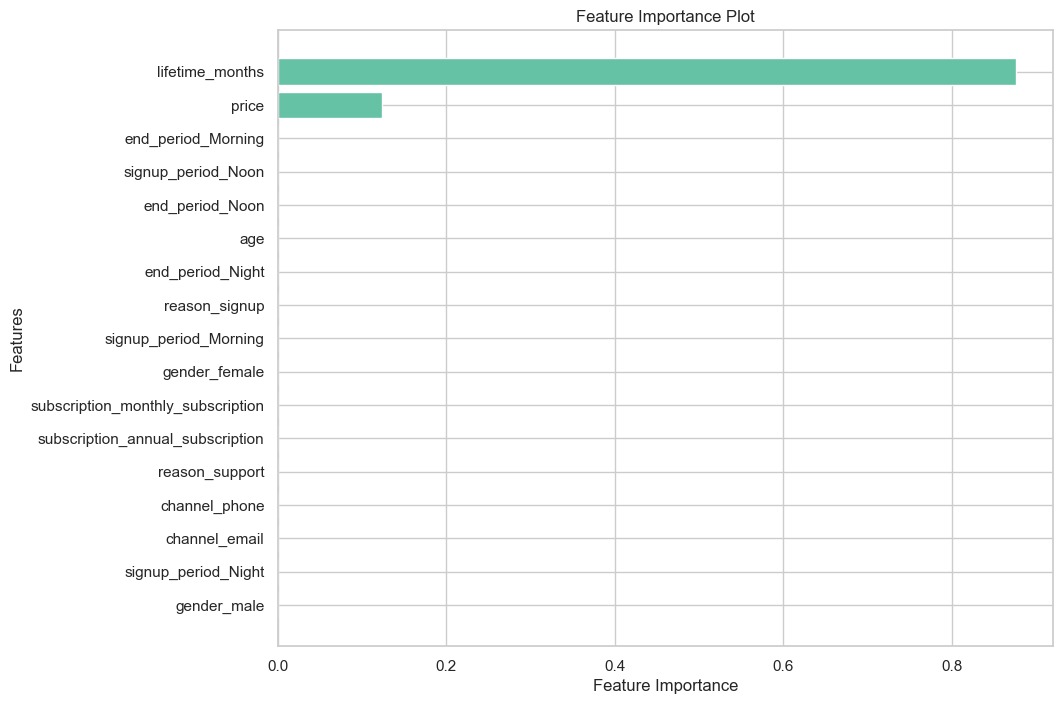

In [249]:
# Getting feature importances
feature_importance = xgb_tuned.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(X_train_scaled.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_train_scaled.shape[1]), np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


## Results

### Key Features Impacting Customer Lifetime Value (CLV)

From our analysis, we identified that only two features significantly affect Customer Lifetime Value (CLV), namely:

1. **Lifetime Months**: This feature represents the number of months a customer has been subscribed. Interestingly, the type of subscription, whether annual or monthly, strongly influences this feature. Customers with annual subscriptions tend to have a longer lifetime compared to those with monthly subscriptions.

2. **Price**: The price of the subscribed product also plays a crucial role in determining CLV. Higher-priced subscriptions correlate positively with higher CLV, indicating that customers investing more in their subscriptions tend to have a higher long-term value to the business.

### Distribution of Lifetime Months against Customer Lifetime Value

To further understand the relationship between Lifetime Months and Customer Lifetime Value, we visualized their distribution as seen above

The visualization demonstrates a clear trend where customers with longer subscription lifetimes tend to have higher CLV. This underscores the importance of customer retention strategies in maximizing CLV and long-term profitability.


## Conclusion

Our modeling endeavors to predict Customer Lifetime Value (CLV) have yielded valuable insights into the factors influencing long-term customer value in subscription-based businesses.

Through a systematic approach encompassing data preprocessing, feature engineering, model selection, and hyperparameter tuning, we identified XGBoost as the optimal algorithm for CLV prediction. Leveraging advanced machine learning techniques and extensive cross-validation, we developed a robust predictive model capable of accurately estimating CLV with remarkable performance metrics.

Key findings from our analysis reveal that the number of lifetime months and subscription price are the primary drivers of CLV. Furthermore, the type of subscription (annual or monthly) significantly impacts the duration of customer relationships, thereby influencing CLV.

Our visualization of the distribution of Lifetime Months against Customer Lifetime Value underscores the importance of customer retention strategies in maximizing CLV and long-term profitability. Customers with longer subscription lifetimes tend to exhibit higher CLV, highlighting the critical role of nurturing customer relationships and fostering loyalty.

In conclusion, our optimized XGBoost model provides businesses with a powerful tool for strategic decision-making, enabling targeted marketing efforts, resource allocation optimization, and enhanced customer retention initiatives. By harnessing the insights gained from our modeling efforts, businesses can drive sustainable growth and maximize revenue in the competitive landscape of subscription services.


### Recommendations

- **Implement Targeted Marketing Strategies**: Utilize insights from the CLV model to tailor marketing campaigns towards high-value customer segments, maximizing conversion rates and revenue generation.
  
- **Enhance Customer Retention Efforts**: Develop personalized retention programs focusing on extending customer lifetimes by addressing churn risk factors and enhancing overall customer satisfaction.
  
- **Optimize Pricing Strategies**: Leverage the correlation between subscription price and CLV to adjust pricing tiers, ensuring alignment with customer value perceptions while maximizing long-term profitability.
  
- **Continuously Monitor and Refine the CLV Model**: Regularly update the model with new data to adapt to evolving customer dynamics and market conditions, ensuring its effectiveness in driving strategic decision-making.
  
- **Invest in Customer Experience Initiatives**: Prioritize investments in enhancing the overall customer experience to foster long-term loyalty and increase CLV, ultimately driving sustainable business growth.


### Limitations

- **Limited Models Used**: The CLV model's performance is constrained by the selection of machine learning algorithms considered during the modeling process. Additional algorithms or ensemble methods might offer different insights and improve predictive accuracy.

- **Model Generalization**: While the CLV model may perform well on the training and test datasets, its performance on unseen data or in different market contexts may vary. Generalizing the model to diverse customer segments and market conditions requires careful validation and testing.

- **Interpretability**: Complex machine learning models like XGBoost may lack interpretability, making it challenging to understand the underlying factors driving CLV predictions. Clear interpretation of model outputs is essential for effective decision-making.


***
Applying pickle for deployment of the model

In [251]:
folder_path = "pickle"
file_path = os.path.join(folder_path, "xgb_tuned.pkl")

with open(file_path, "wb") as file:
    pickle.dump(xgb_tuned, file)